<a href="https://colab.research.google.com/github/dswendersonmelo/Data_Science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Lisboa

Lisboa é uma grande e antiga capital, e como outros países da Europa, possui sua importância histórico-cultural sendo o turismo um ponto chave na economia e por isso para quem desejar um dia viajar para lá precisa de um lugar para sua estada e aí que entra o Airbnb que é uma plataforma online que faz a intermediação entre uma pessoa e o "local" em que ela deseja hospedar-se. Em 2019 ela atingiu o marco de 500 milhões de hospedagens[¹](https://www.revistahoteis.com.br/airbnb-atinge-500-milhoes-de-hospedes/)  sem ter um único hotel, o que desafia as redes hoteleiras tradicionais.

<center><img alt="Analisando Airbnb" width="50%" src="https://freesider.com.br/wp-content/uploads/2017/01/Temple-Airbnb-Logo-7.png"></center>


**Neste notebook, iremos realizar uma análise explorátoria sobre a base de dados referente a Lisboa(cidade/distrito) e ver quais *insights* podemos extrair.**


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

**IMPORTANTE:** O portal está em constante evolução, e em algum momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-12-08/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.

Por isso disponiblizo [aqui](https://github.com/dswendersonmelo/Data_Science/raw/main/listings.csv) o conjunto de dados usado para que você sempre possa utilizar esse material.

Com isso em mente, vamos ao projeto.


In [ ]:
#importar os pacotes necessários para a análise 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importar o arquivo listings.csv para um DataFrame
DF = pd.read_csv('https://github.com/dswendersonmelo/Data_Science/raw/main/listings.csv')


## Análise dos Dados

O objetivo desta etapa é criar uma consciência situacional inicial e permitir a compreesão de como os dados estão estruturados.

**Dicionário de variáveis**



*  `id` - É o identificador exclusivo do Airbnb para anúncio de cada imóvel
*  `name` - Nome da propriedade
*  `host_id` - Identificador exclusivo do Airbnb para o anfitrião/usuário
*  `host_name` - Nome do anfitrião (geralmente apenas o primeiro nome)
*  `neighbourhood_group` - O grupo de bairros (que é geocodificado usando a latitude e longitude em relação aos bairros, conforme definido por *shapefiles* digitais abertos ou públicos)*
*  `neighbourhood` - Nome do bairro/freguesia
*  `latitude` - Coordenada da latitude do imóvel
*  `longitude` - Coordenada da longitude do imóvel
*  `room_type` - Informa o tipo de quarto
*  `price` - Preço para alugar o imóvel em moeda local
*  `minimum_nights` - Número mínimo de pernoites para reservar
*  `number_of_reviews` - O número de avaliações que a propriedade possui
*  `last_review` - A data da última/mais recente avaliação
*  `reviews_per_month` - O número de avaliações que a propriedade tem por mês
*  `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
*  `availability_365` - O número de dias de disponibilidade dentro de 365 dias(OBS: pode não estar disponível porque foi reservado por um hóspede ou bloqueado pelo anfitrião)
*  `number_of_reviews_ltm` - O número de avaliações que a propriedade tem nos últimos 12 meses
*  `license` - A licença, autorização ou número de registro

NOTA : As informações referentes ao significado de cada variável pode ser acessada pelo [link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing) disponibilizado no portal *Inside Airbnb*.

(*) Conquanto a variável chama-se `neighbourhood_group` em nosso DataFrame, encontrei apenas, no dicionário de dados do portal, uma chamada `neighbourhood_group_cleansed`. E pela proximidade do significado semântico, considerei que denotavam as mesmas informações.




Antes de iniciar qualquer análise, vamos ver a "cara" do nosso *dataset* a partir das 5 primeiras entradas.

In [ ]:
DF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,32,2021-11-01,0.36,1,315,6,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,50,2,127,2021-11-27,1.37,1,325,14,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,337,2021-12-03,2.53,1,190,13,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,60,2,299,2021-12-03,2.57,1,302,40,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,957,2,64,2021-11-14,0.48,2,248,9,55695/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos verificar os tipos das variáveis e a dimensionalidade de nosso DataFrame. 

Vale lembrar que este *dataset* é uma versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 18.526 entradas e 74 variáveis (`listings.csv.gz`).

In [ ]:
#identificar o volume 
print("Quantidade de entradas:", DF.shape[0])
print("Quantidade de variáveis:", DF.shape[1], '\n')

#identificar os tipos
print(DF.dtypes)


Quantidade de entradas: 18527
Quantidade de variáveis: 18 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante logo no ínicio verificar a presença de valores ausentes nas linhas e com isso entender se são significativos em relação ao total de entradas. Visto que a presença das mesmas pode influir consideravelmente na análise que se quer fazer. 

Verifica-se:  
* Nas variáveis `reviews_per_month` e `last_review`  cerca de 13% de valores ausentes;
* Na variável `license` cerca de 9,7% de valores ausentes;
* E nas variáveis `host_name` e `name` cerca de 0,12% e 0,04%, respectivamente, de valores ausentes.

Pode-se fazer algumas perguntas para melhor compreender estes *missing datas*, que ficariam para uma análise posterior mais aprofundada, como por exemplo:

* As variáveis `reviews_per_month` e `last_review` possuem a mesma porcentagem, isso quer dizer que estão relacionadas? Se sim, em que sentido estão relacionadas?
* Será que ainda estão vazias porque ainda não completaram um mês ou mesmo eram anúncios recentes ou que não tinham avaliações no momento da coleta destes dados?
* Os valores ausentes em `license` indicam apenas que os dados não foram informados no momento do cadastro da propriedade por não possuirem a licença ou outro motivo?
* etc.

In [ ]:
# Identificar e ordenar em ordem decrescente os valores ausentes

((DF.isnull().sum() / DF.shape[0]) * 100).sort_values(ascending = False)

reviews_per_month                 13.526205
last_review                       13.526205
license                            9.710153
host_name                          0.124143
name                               0.043180
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para que tenhamos uma boa visualização da distribuição das variáveis irei plotar o histograma.

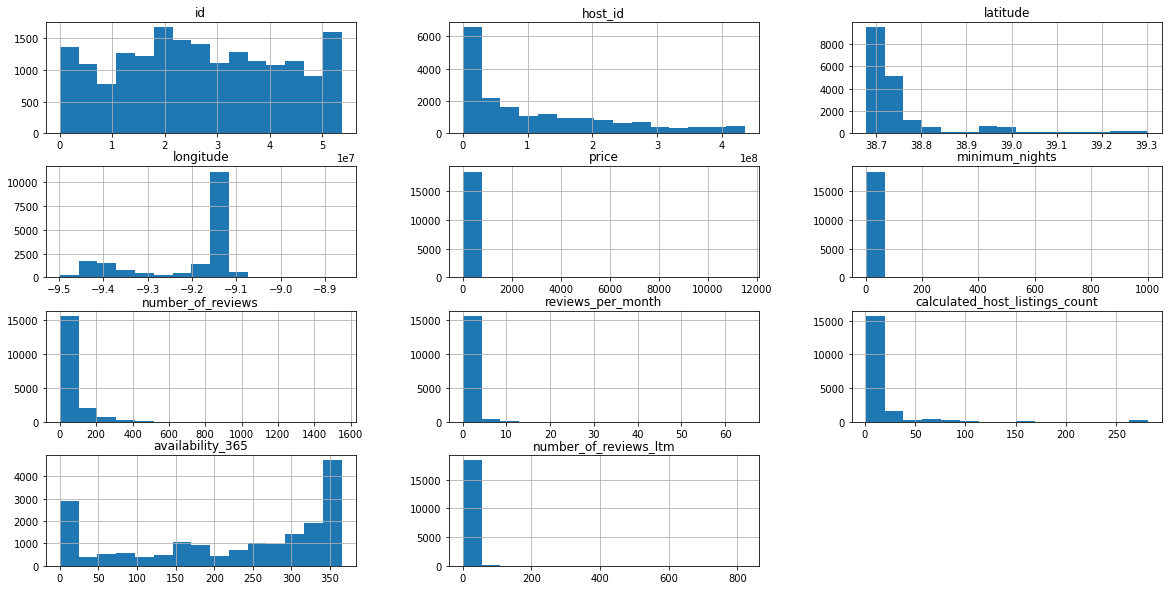

In [ ]:
DF.hist(figsize = (20, 10), bins = 15);

### **Q4. Há *outliers* presentes?**

É possível verificar indícios da presença de *outliers* observando as distribuições dos histogramas acima. Atente-se as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. 

Os *outliers* não seguem uma distribuição e eles se não tratados fazem com que ocorram distorções gráficas. Para confirmar essa hipótese utilizaremos dois métodos rápidos para a detecção deles: 
*  Resumo estatístico com o método `.describe()`
*  Plotar `boxplots` para a variável

In [ ]:
# Resumo estatístico de todas as variáveis numéricas

DF[['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month','calculated_host_listings_count',
    'availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18527.00000,18527.000000,18527.000000,16021.000000,18527.000000,18527.000000,18527.000000
mean,98.33686,4.157554,47.963459,1.207432,14.913208,220.633454,6.547201
std,199.98156,18.357632,74.426092,1.350711,38.819407,130.560416,12.594993
min,0.00000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,49.00000,2.000000,3.000000,0.290000,1.000000,106.000000,0.000000
50%,69.00000,2.000000,16.000000,0.820000,4.000000,262.000000,2.000000
75%,100.00000,3.000000,61.500000,1.750000,11.000000,341.000000,9.000000
max,11499.00000,1000.000000,1550.000000,64.440000,281.000000,365.000000,821.000000


Perceba que pelo o resumo acima podemos confirmar algumas hipóteses:

*  Na variável `price` temos que 75% dos valores de aluguéis estão abaixo de 100, porém seu valor máximo é 11499.
*  E o mesmo ocorre com a variável `minimum_nights`, temos 75% dos valores abaixo de 3 noites minimas e seu máximo passa de 365 dias (1000).

Também cabe uma observação em relação a variável `number_of_reviews` que tem como máximo 1550 enquanto 75% está abaixo de 61,5 avaliações. É possível  enquadrar este caso em um tipo *outlier*, apesar de que realmente pode haver propriedades antigas na base de dados e que já receberam muitas avaliações durante os anos. Contudo, não aprofundaremos aqui essa discussão.

Prossigamos a análise. 

#### Boxplot para `price`

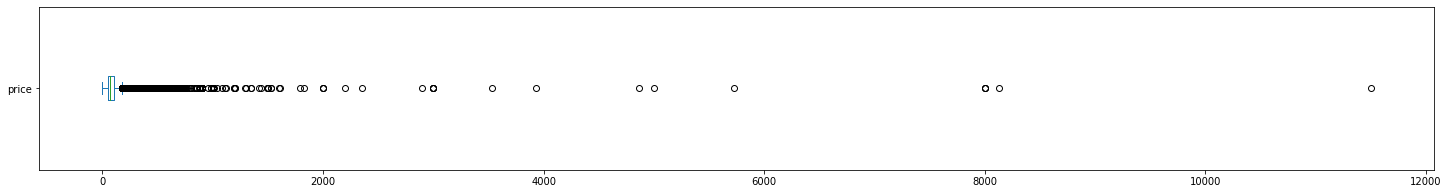

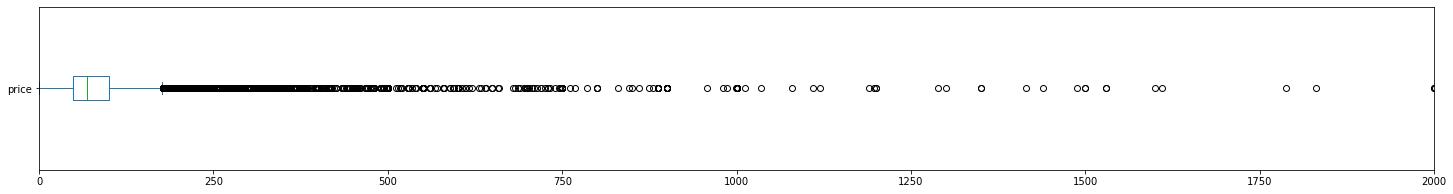


Valores acima de 800 euros: 90 entradas


In [ ]:
# Plotar gráfico de maneira geral
DF.price.plot(kind = 'box', vert = False, figsize = (25,3));
plt.show()

#Plotar gráfico de 0 à 2000 para melhor visualização
DF.price.plot(kind = 'box', vert = False, figsize = (25,3), xlim =(0,2000));
plt.show()

# Ver quantidade de valores acima de 800.
print("\nValores acima de 800 euros: {} entradas".format(len(DF[DF.price > 800])))


#### Boxplot para `minimum_nights`

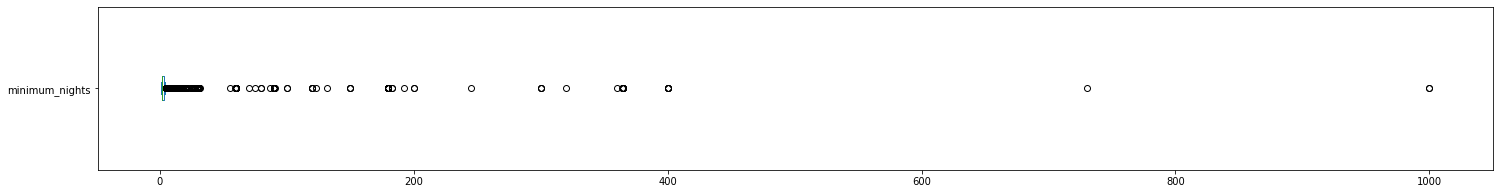

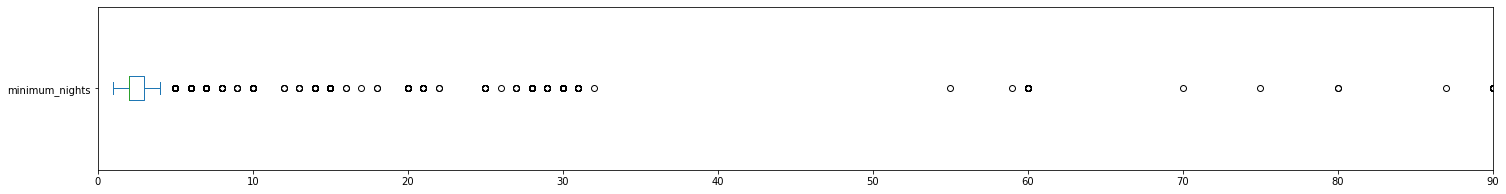


Quantidade minima de noites acima de 30: 135 entradas


In [ ]:
# Plotar gráfico de maneira geral
DF.minimum_nights.plot(kind = 'box', figsize = (25,3), vert = False);
plt.show();

#Plotar gráfico de 0 à 90 noites
DF.minimum_nights.plot(kind = 'box', figsize = (25, 3), vert = False, xlim = (0,90));
plt.show()

# Ver quantidade de valores acima de 30 noites
print("\nQuantidade minima de noites acima de 30: {} entradas" .format(len(DF[DF.minimum_nights > 30])))

#### Histogramas sem *outliers*

Como identificamos *outliers*, vamos proceder com a limpeza e em seguida plotar os histogramas

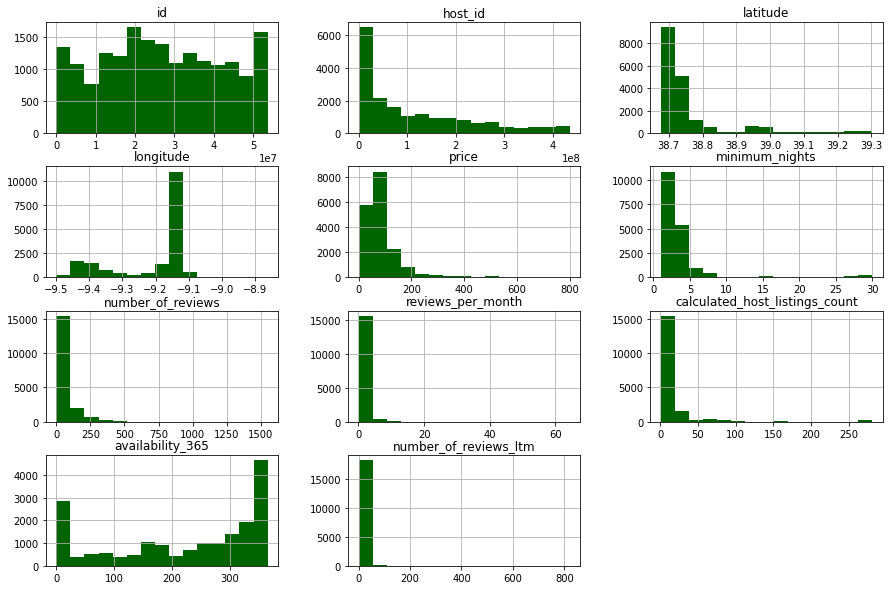

In [ ]:
#Remover outliers em um novo DataFrame
DF_clean = DF.copy()
DF_clean.drop(DF_clean[DF_clean.price > 800].index, axis = 0, inplace = True)
DF_clean.drop(DF_clean[DF_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#Plotar histogramas
DF_clean.hist(figsize = (15, 10), bins = 15, color = 'darkgreen');

Em uma busca no Airbnb, percebi que muitas das propriedades que possuem um valor alto por noite também informam a quantidade de hóspedes que é aceita por esse pagamento, variando desde 3 ou mais hóspedes, alguns vi aceitarem até 16 pessoas. Em uma análise posterior, seria importante ter essa observação em mente. 

### **Q5. Qual a média dos preços dos aluguéis e da quantidade mínima de noites**

É interessante obter a média de algo porque ela é como uma espécie de "resumo" em que o conjunto de valores está em torno. Vamos ver a média dos preços abaixo:


In [ ]:
print("Média dos preços dos aluguéis: {:.2f} euros\n".format(DF_clean.price.mean()))
print("Média da quantidade mínima de noites: {:.0f}".format(DF_clean.minimum_nights.mean()))

Média dos preços dos aluguéis: 89.82 euros

Média da quantidade mínima de noites: 3


### **Q6. Qual a correlação existente entre as variáveis**

Correlação é um conceito ligado à área da probabilidade e estatística e significa que existe uma relação entre duas coisas. Neste nosso projeto, iremos identificar uma relação ou semelhança entre duas variáveis.

E para medir essa relação vou:

*  Criar uma matriz de correlação
*  Gerar a partir dessa matriz um *heatmap* com a biblioteca `seaborn`

In [ ]:
# Matriz de correlação com as variáveis numéricas
corr = DF_clean[['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month','calculated_host_listings_count',
    'availability_365','number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.021457,-0.123957,-0.130429,0.006375,0.062531,-0.102215
minimum_nights,-0.021457,1.000000,-0.081596,-0.122116,-0.046052,-0.079474,-0.111734
number_of_reviews,-0.123957,-0.081596,1.000000,0.712889,-0.089811,0.002904,0.502465
reviews_per_month,-0.130429,-0.122116,0.712889,1.000000,-0.054494,0.052299,0.769865
calculated_host_listings_count,0.006375,-0.046052,-0.089811,-0.054494,1.000000,0.060968,-0.011396
availability_365,0.062531,-0.079474,0.002904,0.052299,0.060968,1.000000,0.101560
number_of_reviews_ltm,-0.102215,-0.111734,0.502465,0.769865,-0.011396,0.101560,1.000000


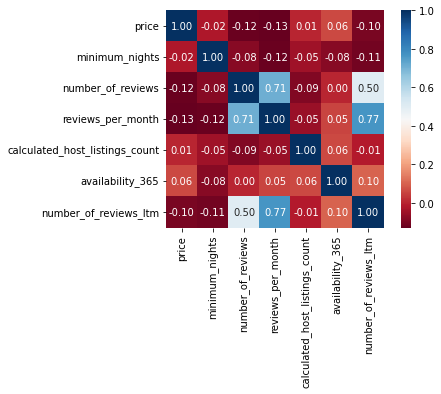

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. O que podemos inferir inicialmente das variáveis `price` e `minimum_nights` a partir de um gráfico do tipo scatter**

Um gráfico de dispersão é usado para verificar se existe uma relação de *causa* e *efeito* entre duas variáveis. Não significando porém que uma é causa da outra, mas que existe uma relação. Vejamos abaixo o gráfico:

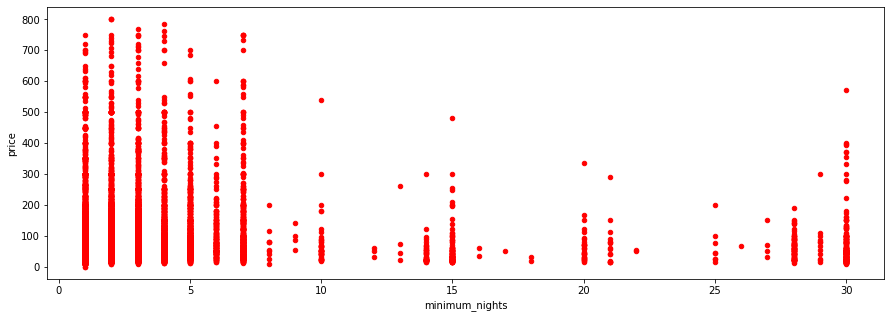

In [ ]:
DF_clean.plot.scatter('minimum_nights', 'price', figsize = (15,5), color = 'red');

Como vemos em nosso gráfico de dispersão, os valores mais altos estão concentrados abaixo de 10 noites. Enquanto alguns imóveis pedem uma quantidade mínima de noites acima de 20 dias porém com valores de aluguéis menores que 100 euros.

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type` nos informa o tipo de imóvel que queremos alugar e acessando o site do Airbnb, vemos que ele nos oferece várias opções desde alugar um apartamento inteiro até dividir o quarto com outras pessoas.

Vamos vê a quantidade e porcetagem de cada tipo disponível.

In [ ]:
# Quantidade dos tipos oferecidos
DF_clean.room_type.value_counts() 

Entire home/apt    13892
Private room        3856
Hotel room           301
Shared room          254
Name: room_type, dtype: int64

In [ ]:
# Porcentagem dos tipos oferecidos
DF_clean.room_type.value_counts() / DF_clean.shape[0] * 100

Entire home/apt    75.900126
Private room       21.067585
Hotel room          1.644539
Shared room         1.387751
Name: room_type, dtype: float64

### **Q9. Qual a localidade mais cara em Lisboa**

Um método que nos permiti agrupar dados e daí pode vê-los um em função do outro assim sendo possível extrair  alguns *insights* é o método `.groupby()`. Vamos usá-lo para agrupar as informações das localidades(`neighbourhood`) e dos preços (`price`) e por fim fazer uma comparação entre os locais.

In [ ]:
#Agrupar Dados e exibir os 20 maiores
DF_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)[0:20]

neighbourhood
Alguber                                            610.000000
Aveiras de Baixo                                   450.000000
Cardosas                                           287.000000
Freiria                                            281.000000
Ota                                                249.000000
Bucelas                                            236.600000
Vale do Paraso                                     220.000000
Santa Brbara                                       206.166667
Vermelha                                           205.000000
Alhandra, So Joo dos Montes e Calhandriz           163.692308
Turcifal                                           158.777778
Enxara do Bispo, Gradil e Vila Franca do Rosrio    157.333333
Castanheira do Ribatejo e Cachoeiras               151.000000
Arranh                                             150.000000
Almargem do Bispo, Pro Pinheiro e Montelavar       149.346154
Ribamar                                            146.3

Com as informações que temos da latitude e longitude, podemos plotar um gráfico do tipo *scatter* para cada entrada acima.

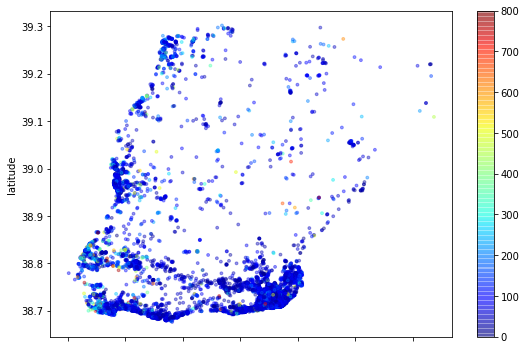

In [ ]:
# Plotar gráfico dos imóveis pela latitude e longitude
# x = longitude ; y = latitude

DF_clean.plot.scatter(x = 'longitude', y = 'latitude', alpha=0.4, c = DF_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(9,6));

Se você pesquisar os nomes das localidades acima, poderá estranhar que eles referem-se a outras cidades que não Lisboa e de fato o são. Mas acontece que a divisão administrativa de Portugal é feita em distritos e essas em municípios e por fim estes em freguesias. E com isso a variável `neighbourhood` refere-se mais precisamente as **freguesias** que pertecem a municípios do Distrito de Lisboa. Por causa disso temos esse formato no gráfico scatter.

Também é possivel perceber que a freguesia que teve a maior média de preço foi *Alguber* e fazendo uma rápida pesquisa notamos sua distância dos grandes centros. O que poderia causar essa diferença enorme de média em relação as demais? Uma hipótese seria que há no máximo poucas propriedades e que possuíssem valores altos, vejamos abaixo:

In [ ]:
DF_clean[DF_clean.neighbourhood == 'Alguber']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
17194,50695709,"Charming Countryhouse - Vineyards, Nature & Pool",409658585,Pedro,Cadaval,Alguber,39.27375,-9.0207,Entire home/apt,610,1,1,2021-08-10,0.24,1,351,1,5780


Isso confirma nossa hipótese, há apenas uma propriedade em *Alguber* que causa a distorção na comparação local/valor. É importante fazer essa análise com as demais localidades em que existe a mesma suspeita mas neste trabalho não aprofundaremos isso.

### **Conclusões**

Foi realizada apenas uma análise de dados exploratória inicial na base de dados do Airbnb em sua versão resumida. Percebemos a presença de vários *outliers*, dados ausentes e que em algumas localidades há poucos imóveis que causam distorções nas informações que se deseja extrair.

Enfim, após essa abordagem inicial, é recomendado em uma próxima análise exploratória o uso do *dataset* completo (`listings.csv.gz`) com 74 variáveis para uma melhor compreesão.
